# Objective
* We will predict the price of the laptop based on some features

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
# Importing plotting libraries 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
# Ignoriing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
df = pd.read_csv("laptop_data.csv")
df.head() # Displaying first five rows

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape # Number of rows and columns

(1303, 12)

In [4]:
# Discarding unnecessary feature
df.drop(columns = ['Unnamed: 0'],inplace=True)

In [5]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


### Observation :
* Dataset contains 1303 rows and 11 columns.
* Dataset contains both numerical and categorical features.
* Dataset doesn't contain any null values.

In [6]:
# Checking for total number duplicate rows
df.duplicated().sum()

29

In [7]:
# Discarding the duplicate rows
df.drop_duplicates(inplace=True)

In [8]:
# Statistical summary of dataset
df.describe() 

,Inches,Price
count,1274.000000,1274.000000
mean,15.022449,60503.185074
std,1.429940,37333.222977
min,10.100000,9270.720000
25%,14.000000,32495.605200
50%,15.600000,52693.920000
75%,15.600000,79773.480000
max,18.400000,324954.720000


# Data Preprocessing

In [9]:
# Removing 'GB' from Ram variable and chaning it's datatype to int
df['Ram']=df['Ram'].str.replace('GB','')
df['Ram']=df['Ram'].astype(int)

In [10]:
# Removing 'kg' from Ram variable and chaning it's datatype to float
df['Weight']=df['Weight'].str.replace('kg','')
df['Weight'] = df['Weight'].astype(float)

#  EDA

### Exploring Price Variable

In [11]:
df['Price'].describe()

count      1274.000000
mean      60503.185074
std       37333.222977
min        9270.720000
25%       32495.605200
50%       52693.920000
75%       79773.480000
max      324954.720000
Name: Price, dtype: float64

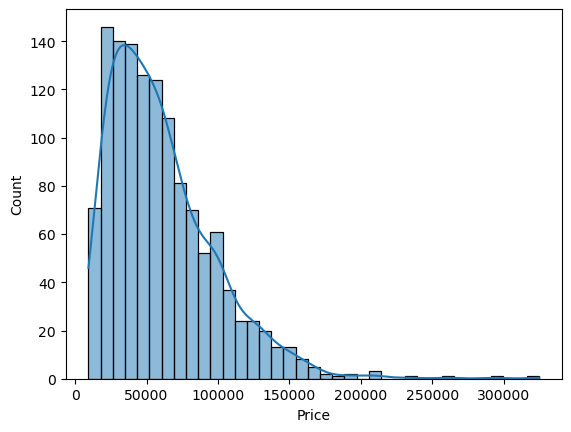

In [12]:
# visuazling price variable
sns.histplot(x=df['Price'],kde=True);

* Screw Curve

## Exploring Categorical Variables

In [13]:
# Finding Categorical Variables
categorical_variables = [var for var in df.columns if df[var].dtype =='O' ]
print(f"Total Number of categorical variables are {len(categorical_variables)}\n")
print(f"The Categorical Variables are: {categorical_variables}")

Total Number of categorical variables are 7

The Categorical Variables are: ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']


In [14]:
#Finding Cardinality for each variable: Number of labels
for var in categorical_variables:
    print(f"{var} contains {len(df[var].unique())} lables ")
    

Company contains 19 lables 
TypeName contains 6 lables 
ScreenResolution contains 40 lables 
Cpu contains 118 lables 
Memory contains 39 lables 
Gpu contains 110 lables 
OpSys contains 9 lables 


## Exploring Categorical Variables one by one
### Exploring *Company* Variable

In [15]:
#checking Labels in Company Variable
print(df['Company'].unique())

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


### Frequency distribution of values in company variable

In [16]:
df['Company'].value_counts()

Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

### Visualizing frequency distribution of company variable

<AxesSubplot:>

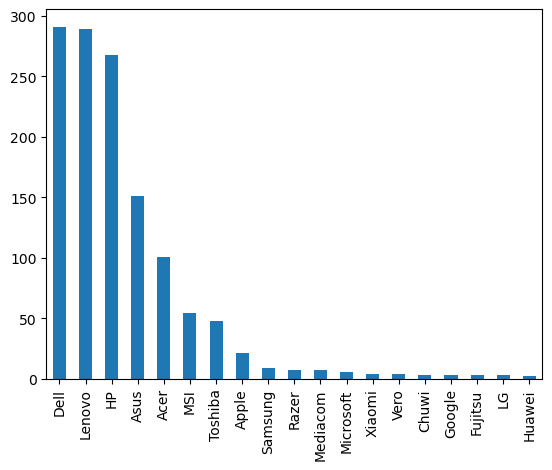

In [17]:
df['Company'].value_counts().plot(kind='bar')

* Dell, Lenovo, HP company laptops are available in large quantity than others

### Visualization of average price vs Company

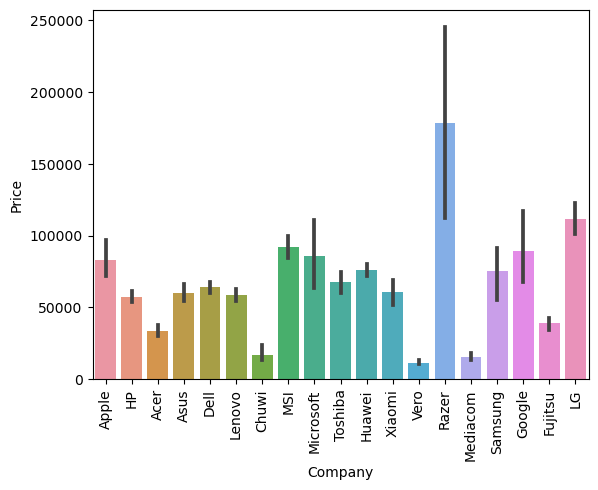

In [18]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## Exploring *TypeName* variable

In [19]:
print(f"TypeName contains {len(df['TypeName'].unique())} lables\n")
print(f"The labels in TypeName variable are: {df['TypeName'].unique()}")

TypeName contains 6 lables

The labels in TypeName variable are: ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']


### Frequency distribution of values in *TypeName* Variable

In [20]:
df.TypeName.value_counts()

Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: TypeName, dtype: int64

### Visualizing frequency ditributuion of values in Typename variable

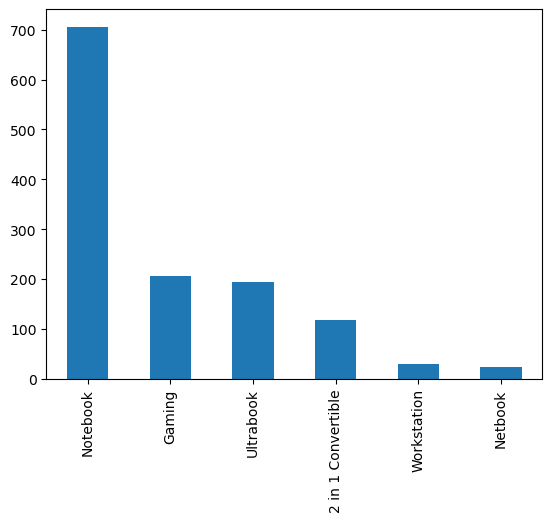

In [21]:
df['TypeName'].value_counts().plot(kind='bar');

* Notebook type are mostly sold compare to other types

### Visulazing average price of every label in typename variable

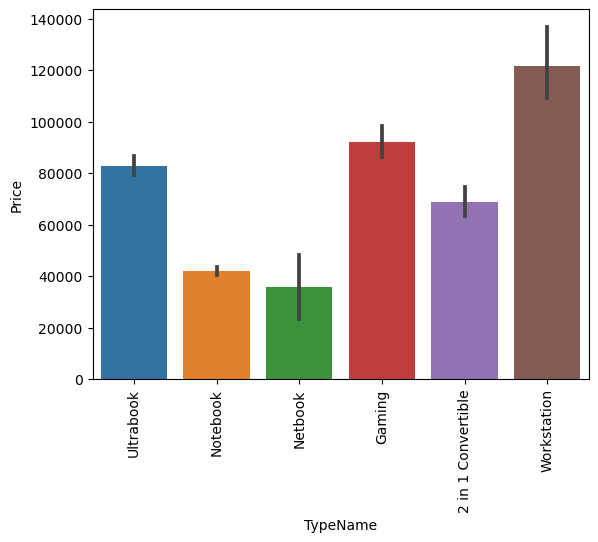

In [22]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Observation
    Prices vary based on TypeName

## Exploring *ScreenResolution* Variable

### Frequency distribution of values in ScreenResolution

In [23]:
df.ScreenResolution.value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

## Feature engineering on ScreenResolution variable
We can notice that there are some information in this variable from which we can extract some new variables like if laptop is touchsceen or not, it has ips panel or not etc and store in new variable

### Extracting if laptop is touch screen or not from screen resolution

In [24]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

### Extracting if laptop has IPS Panel or not from screen resolution

In [25]:
df['Ips Panel']=df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

### Extracting Resolution from screen resolution 

In [26]:
#Storing X resolution
df['x_resolution']=df['ScreenResolution'].str.split(' ').str[-1].str.split('x').str[0]

In [27]:
#storing Y resolution
df['y_resolution']=df['ScreenResolution'].str.split(' ').str[-1].str.split('x').str[-1]

In [28]:
#chaning dtype of both x resol and y res to int
df['y_resolution']=df['y_resolution'].astype(int)
df['x_resolution']=df['x_resolution'].astype(int)

### Deleting the ScreenResolution variable

In [29]:
df.drop(columns=['ScreenResolution'],inplace=True)

## Exploring *CPU* variable

### Frquency distribution of values in Cpu

In [30]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 118, dtype: int64

## Feature engineering on *'cpu'* variable

### Extracting core processor types in one variale

In [31]:
df['Cpu_Type']=df['Cpu'].str.split(' ').str[0:3].str.join(' ')

### From the Cpu type column we will extract 5 categorical values and will store in new column

In [32]:
### Creating a function which will fetch the cpu type
def fetch_cpu(text):
    if text == 'Intel Core i5' or text=='Intel Core i7' or text=='Intel Core i3':
        return text
    else:
        if text.split(' ')[0] == 'Intel':
            return 'Other Inter processor'
        else:
            return 'AMD Processor'

In [33]:
df['Cpu_Brand']=df['Cpu_Type'].apply(fetch_cpu)

In [34]:
df['Cpu_Brand'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Other Inter processor'], dtype=object)

### Drop the Cpu and Cpu type column

In [35]:
df.drop(columns=['Cpu','Cpu_Type'],inplace=True)

### Exploring the Cpu Brand variable

In [36]:
# Frequency distribution of values in Cpu brand
df['Cpu_Brand'].value_counts()

Intel Core i7            515
Intel Core i5            423
Other Inter processor    141
Intel Core i3            134
AMD Processor             61
Name: Cpu_Brand, dtype: int64

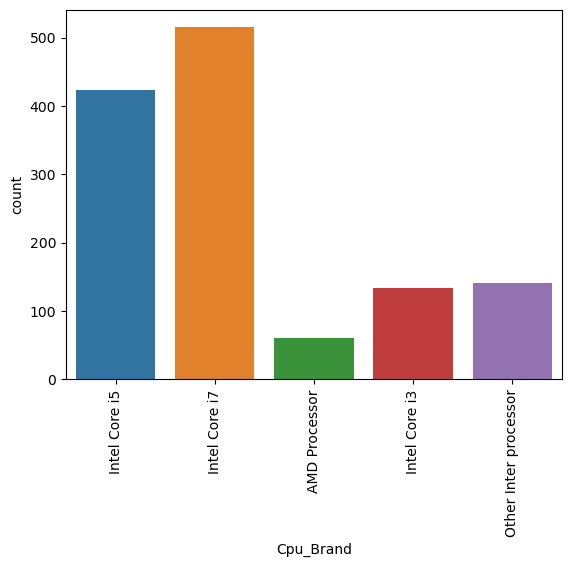

In [37]:
# Visualization of Cpu brand
sns.countplot(df['Cpu_Brand'])
plt.xticks(rotation='vertical')
plt.show()

*  i7 and i5 processor are available in more numbers as compared to others

### Visualization of average price of diffrent cpu brands

<AxesSubplot:xlabel='Cpu_Brand', ylabel='Price'>

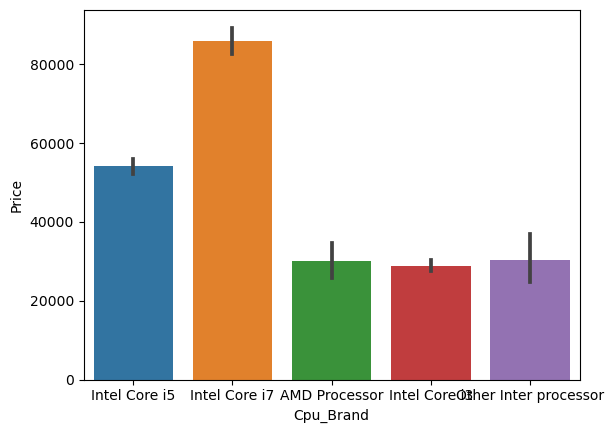

In [38]:
sns.barplot(x=df['Cpu_Brand'],y=df['Price'])

* Average price of intel core i7 and i5 are more as compared to others

## Exploring *Memory* Variable

In [39]:
#lables in memory variable
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

* We can extrac some features using feature engineering.

## Feature engineering on  Memory variable

### Creating new column SSD that will store memory size of SSD type storage

In [40]:
df['SSD']=df['Memory'].apply(lambda x : x.split('SSD')[0].replace('GB','').replace("TB",'000') if 'SSD' in x else 0)

### Creating new column HDD that will store memory size of HDD type storage

In [41]:
df['HDD']=df['Memory'].apply(lambda x: x.split('HDD')[0].replace('GB','').replace('TB','000') if 'HDD' in x else 0)
df['HDD']=df['HDD'].apply(lambda x:str(x).split()[-1] if 'Flash Storage' or 'SSD' in str(x) else str(x))
df['HDD']=df['HDD'].apply(lambda x:x.replace('1.0000','1000'))

### Create new variable that will store flash memory

In [42]:
df['Flash Storage']=df.Memory.apply(lambda x: x.split('Flash Storage')[0].replace('GB','').replace('TB','000') if 'Flash Storage' in x else 0)

### Creating new column *Hybrid* that will store hybrid memory size

In [43]:
df['Hybrid'] = df.Memory.apply(lambda x:x.split('Hybrid')[0].replace('GB','') if 'Hybrid' in x else 0)

In [44]:
df['Hybrid']=df['Hybrid'].apply(lambda x: str(x).split()[-1] if 'SSD' in str(x) else str(x))

In [45]:
df['Hybrid']=df.Hybrid.apply(lambda x : x.replace('TB','').replace('1.0','1000'))

### Changing dtype of all new variable to int and droping the *Memory* variable

In [46]:
df['SSD'] = df['SSD'].astype(int)
df['HDD'] = df['HDD'].astype(int)
df['Flash Storage'] = df['Flash Storage'].astype(int)
df['Hybrid'] = df['Hybrid'].astype(int)
df.drop(columns=['Memory'],inplace=True)

### Exploring *GPU* feature
* Checking for all unique values in 'GPU' and it's frequency distribution

In [47]:
df['Gpu'].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [48]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

* There are many categories present, we can reduce it to three using a function from 'gpu' variable.
    - Intel ,Nvidia and AMD 

### Creating a function which will extract

In [49]:
def fetch_gpu(string):
    if 'Intel' in string:
        return 'Intel'
    elif 'Nvidia' in string:
        return 'Nvidia'
    else:
        return 'AMD'

In [50]:
#applying the function in Gpu variable
df['Gpu']=df['Gpu'].apply(fetch_gpu)

### Visualization of  frquency distribution of values in  'GPU'

<AxesSubplot:>

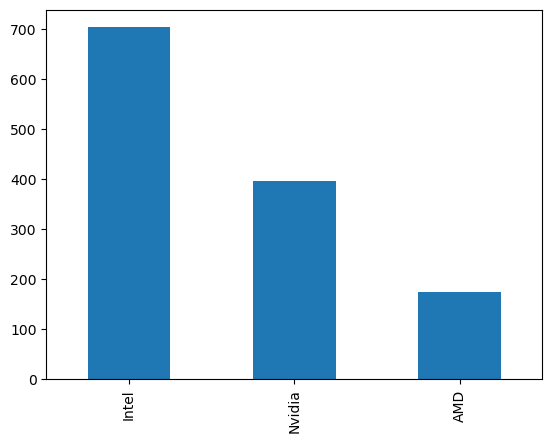

In [51]:
df['Gpu'].value_counts().plot(kind='bar')

### Average price of values in GPU

<AxesSubplot:xlabel='Gpu', ylabel='Price'>

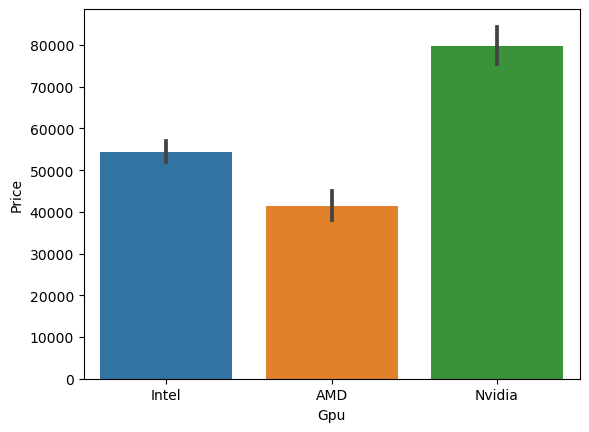

In [52]:
sns.barplot(x=df['Gpu'],y=df['Price'])

# Exploring *OpSys* feature

### Frequency distribution of values in OpSys

In [53]:
df.OpSys.value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

<AxesSubplot:>

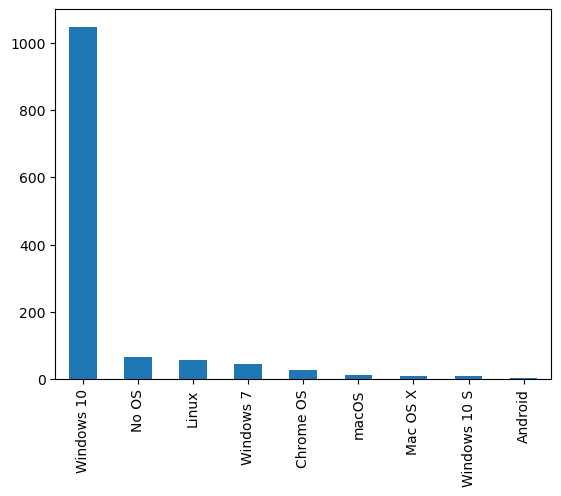

In [54]:
### Visualizing Frequnecy distribution of OpSys
df.OpSys.value_counts().plot(kind='bar')

* In this feature also there are many categories, we can reduce the categories into three categories.

In [55]:
# Creating a function which will extract three three categories
def fetch_os(string):
    if 'Windows' in string:
        return 'Windows OS'
    elif 'mac' in string or 'Mac' in string:
        return 'Mac OS'
    else:
        return 'Other OS'

In [56]:
df['OpSys']=df['OpSys'].apply(fetch_os)

### Visualization of frquency distribution of OpSys

<AxesSubplot:>

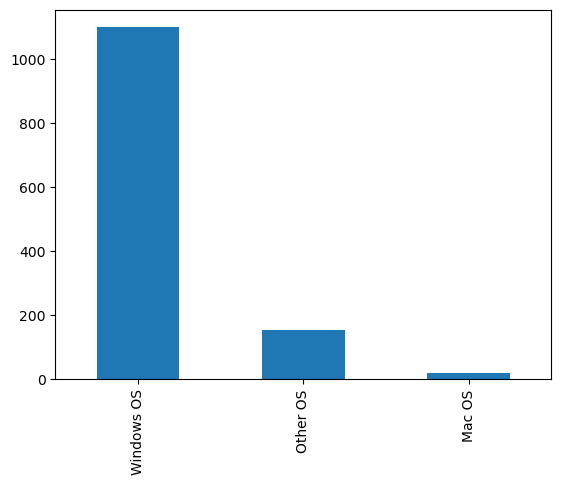

In [57]:
df['OpSys'].value_counts().plot(kind='bar')

* Window OpSys are sold mostly

### Visulization of average price of OpSys

<AxesSubplot:xlabel='OpSys', ylabel='Price'>

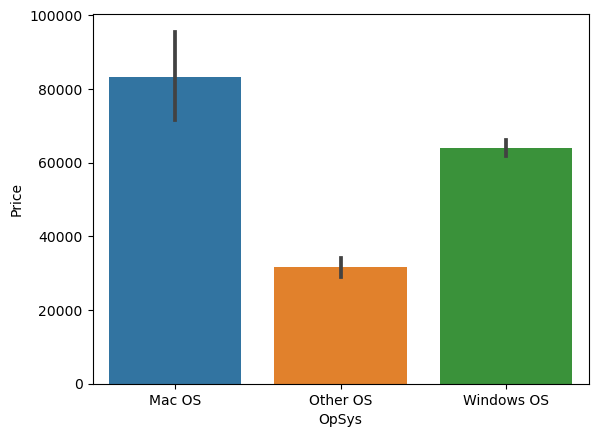

In [58]:
sns.barplot(x=df['OpSys'].apply(fetch_os),y=df['Price'])

* Average price of Mac Os are high compare to window and other OS

# Exploring Numerical Features

In [59]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(numerical_features)

['Inches', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips Panel', 'x_resolution', 'y_resolution', 'SSD', 'HDD', 'Flash Storage', 'Hybrid']


## Correlation of every numerical features with Price feature

In [60]:
df.corr()['Price'] 

Inches           0.066990
Ram              0.740106
Weight           0.212192
Price            1.000000
Touchscreen      0.188631
Ips Panel        0.250358
x_resolution     0.552074
y_resolution     0.548111
SSD              0.675559
HDD             -0.097209
Flash Storage   -0.037176
Hybrid           0.022533
Name: Price, dtype: float64

* x_resolution and y_resolution have multicollinearity
* Inches and Hybird are not highly correlated
* Ram is highly correlated
* HDD & Flash Storage are negatively correlated

### Creating a new column PPI(pixel per inches) by combing x_res,y_res and Inches

**Formula to find PPI= np.sqrt( x_res ** 2 + y_res ** 2) / inches

PPI is a property of laptops that we can use as new feature by combing x_res,y_res and Inches using above formula and store it in new variable PPI

In [61]:
df['PPI'] = round(np.sqrt(df['x_resolution']**2 + df['y_resolution']**2)/df['Inches'],2)

In [62]:
### Deleting the x_res,y_res and inches column
df.drop(columns=['Inches','x_resolution','y_resolution'],inplace=True)

In [63]:
### correlation of price with PPI
df['Price'].corr(df['PPI'])

0.46955717372834427

### Deleting the column Hybrid and Flash Storage column because it's not highly correlated and also many laptop doesn't have this feature

* Not deleteting the HDD  column even tho it's negatively correlated because it might be useful

In [64]:
df.drop(columns=['Flash Storage','Hybrid'],inplace=True)

### updating numerical features

In [65]:
numerical_features = [feature for feature in df.columns if df[feature].dtype !='O']

In [66]:
numerical_features

['Ram', 'Weight', 'Price', 'Touchscreen', 'Ips Panel', 'SSD', 'HDD', 'PPI']

## Exploring Ram variable

## Visualization of frequency distribution of values in Ram variable

<AxesSubplot:>

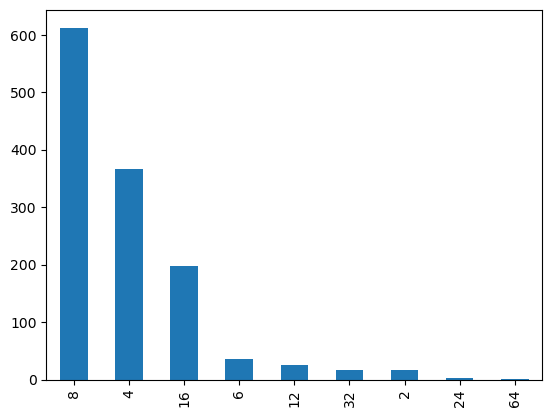

In [67]:
df['Ram'].value_counts().plot(kind='bar')

* 8 gb ram laptops units are sold mostly

### Visualization of average  price of diffrent ram values

<AxesSubplot:xlabel='Ram', ylabel='Price'>

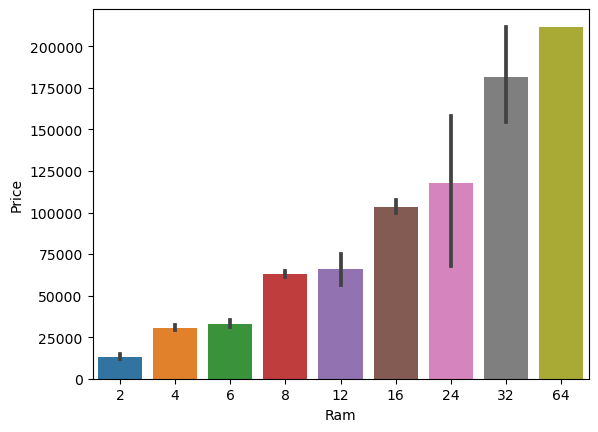

In [68]:
sns.barplot(x=df['Ram'],y=df['Price'])

* When ram size increses, price increses
* Price and ram have linear relationship

## Exploring *Weight* Feature

<AxesSubplot:xlabel='Weight', ylabel='Density'>

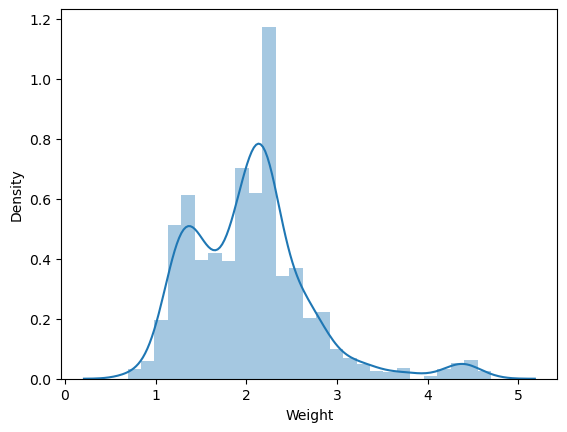

In [69]:
sns.distplot(df['Weight'])

In [70]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'Touchscreen', 'Ips Panel', 'Cpu_Brand', 'SSD', 'HDD', 'PPI'],
      dtype='object')

In [71]:
df=df.loc[:,['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight',
       'Touchscreen', 'Ips Panel', 'Cpu_Brand', 'SSD', 'HDD', 'PPI','Price']]

### Storing the cleaned data in new csv so if somehing happend,we still can have our data saved for our model

In [72]:
df.to_csv("Cleaned_Laptop_Data.csv")

# Independent variables

In [73]:
X = df.iloc[:,:-1]

# Dependent Variable

* Since the price distribtion is skewed,we will take log of every value in price so that our model will works well and which predicted the output, we will convert it back to normal price using exp

In [74]:
y = round(np.log(df.iloc[:,-1]),3)

### Visulization of depenent variable

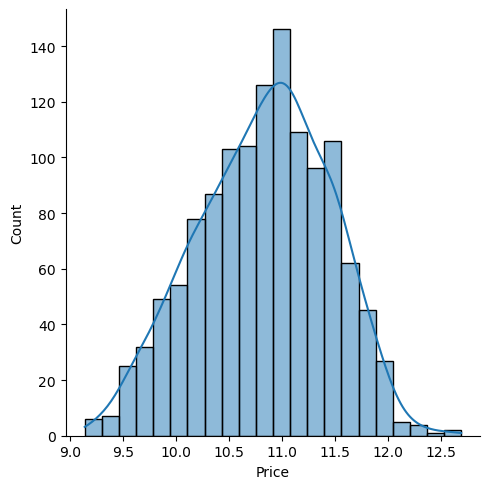

In [75]:
sns.displot(y,kde=True)

In [76]:
# Importing required libraries for modelelling
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.linear_model import ElasticNet,LinearRegression,Ridge,Lasso
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import r2_score

In [77]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Linear Regression

In [78]:
# Endcoding categorical features
# One Hot Encdoing(Nominal Encoding)
transformer1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,3,4,8])],remainder='passthrough')

In [79]:
# Linear Model
transformer2 = LinearRegression()

In [80]:
# Creating Pipeline
pipe = Pipeline([('transformer1',transformer1),('transformer2',transformer2)])

In [81]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 8])])),
                ('transformer2', LinearRegression())])

In [82]:
y_pred = pipe.predict(X_test)

In [83]:
# Checking r2 score
r2_score(y_test,y_pred)

0.8314646733982451

# Ridge Regression

In [84]:
transformer1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,3,4,8])],remainder='passthrough')

In [85]:
transformer2 = Ridge()

In [86]:
pipe = Pipeline([('transformer1',transformer1),('transformer2',transformer2)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8311018650951841

# LASSO REGRESSION

In [87]:
transformer1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,3,4,8])],remainder='passthrough')
transformer2 = Lasso(0.001)
pipe = Pipeline([('transformer1',transformer1),('transformer2',transformer2)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('transformer1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 8])])),
                ('transformer2', Lasso(alpha=0.001))])

In [88]:
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.829348223166453

# ElasticNet

In [89]:
transformer1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,3,4,8])],remainder='passthrough')
transformer2 = ElasticNet(alpha=0.001)
pipe = Pipeline([('transformer1',transformer1),('transformer2',transformer2)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8303979200422552

# Decision Tree Regressor

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
transformer1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,3,4,8])],remainder='passthrough')
transformer2 = DecisionTreeRegressor()
pipe = Pipeline([('transformer1',transformer1),('transformer2',transformer2)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7663545538611223

# Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestRegressor
transformer1 = ColumnTransformer(transformers=[('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,3,4,8])],remainder='passthrough')
transformer2 = RandomForestRegressor()
pipe = Pipeline([('transformer1',transformer1),('transformer2',transformer2)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8598446706833138